# Linear Regression

In [20]:
#!pip install numpy
#!pip install pandas
#!pip install seaborn
#!pip install matplotlib


SyntaxError: invalid syntax (3588244330.py, line 6)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 6)  # figure szie ı fix lemek için kullanılır
import warnings
warnings.filterwarnings('ignore')   # uyarıların göz ardı edilmesi için

# Read Data Set

In [3]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
independent variables = feature = estimator = attribute = input 

dependent variables = target = label = output

rows: observation - samples


Features: TV - radio - newspaper

Target  : Sales

SyntaxError: invalid syntax (3803311439.py, line 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.head(5)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [11]:
df.sample(5)

,TV,radio,newspaper,sales
102,280.2,10.1,21.4,14.8
53,182.6,46.2,58.7,21.2
195,38.2,3.7,13.8,7.6
107,90.4,0.3,23.2,8.7
199,232.1,8.6,8.7,13.4


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


%50 (medyan) ile mean değeri birbirine yakınsa normal dağılım gibidir, yoksa skewness vardır. 
std büyük olursa veri kuyruklara yayılmış anlamına gelir.

## Correlation

In [13]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

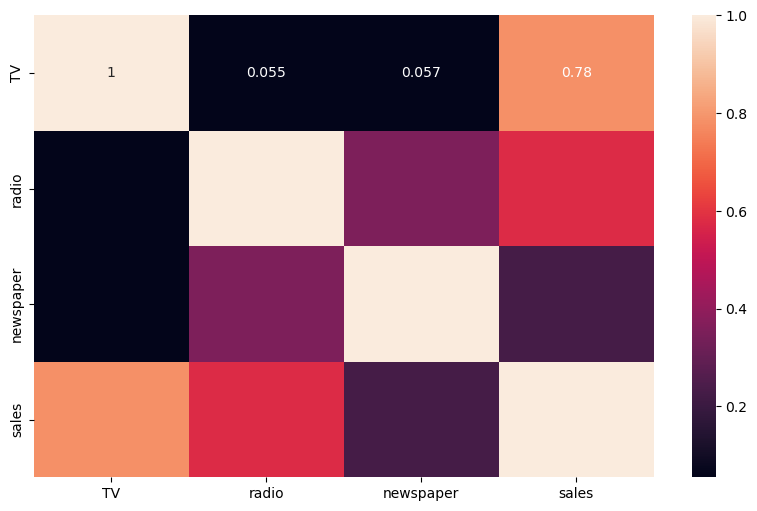

In [22]:
snss.heatmap(df.corr(),annot=True) # annot = True hücrelerde rakam yazar

#### **multicollinearity nedir?**

**Multicollinearity** occurs when two or more independent variables in a regression model are highly correlated with each other.

- Multicollinearity varsa featurelarin birbirileriyle iliskileri, korelasyonu fazladir.

- C ve F mesela ikisi de ayni seyi soyluyor bize. ikisi arasindaki iliski cok yuksektir.

- Biz featurelarin korelasyonunun kendi arasinda dusuk, target var ile cok yuksek olmasini isteriz.

- Multicollinearity durumunu istemeyiz, overfitting'e neden olur.

## Create new independent variable (yeni bir feature oluşturalım) feature enginnering

y = ax + b linear regression formülü y: target variable x: independent feature 

 bu nottebook da simple linear regression konusu incelendiği için 
 tek feature ve tek target variable olmalıdır.

 total_spend = Toplam Harcama

In [25]:
df["total_spend"] = df.TV + df.radio + df. newspaper
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [28]:
df = df.iloc[:, [0,1,2,4,3]]  # sales degerini df de en sonda gostermek ıcın
df

,TV,radio,newspaper,total_spend,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9
...,...,...,...,...,...
195,38.2,3.7,13.8,55.7,7.6
196,94.2,4.9,8.1,107.2,9.7
197,177.0,9.3,6.4,192.7,12.8
198,283.6,42.0,66.2,391.8,25.5


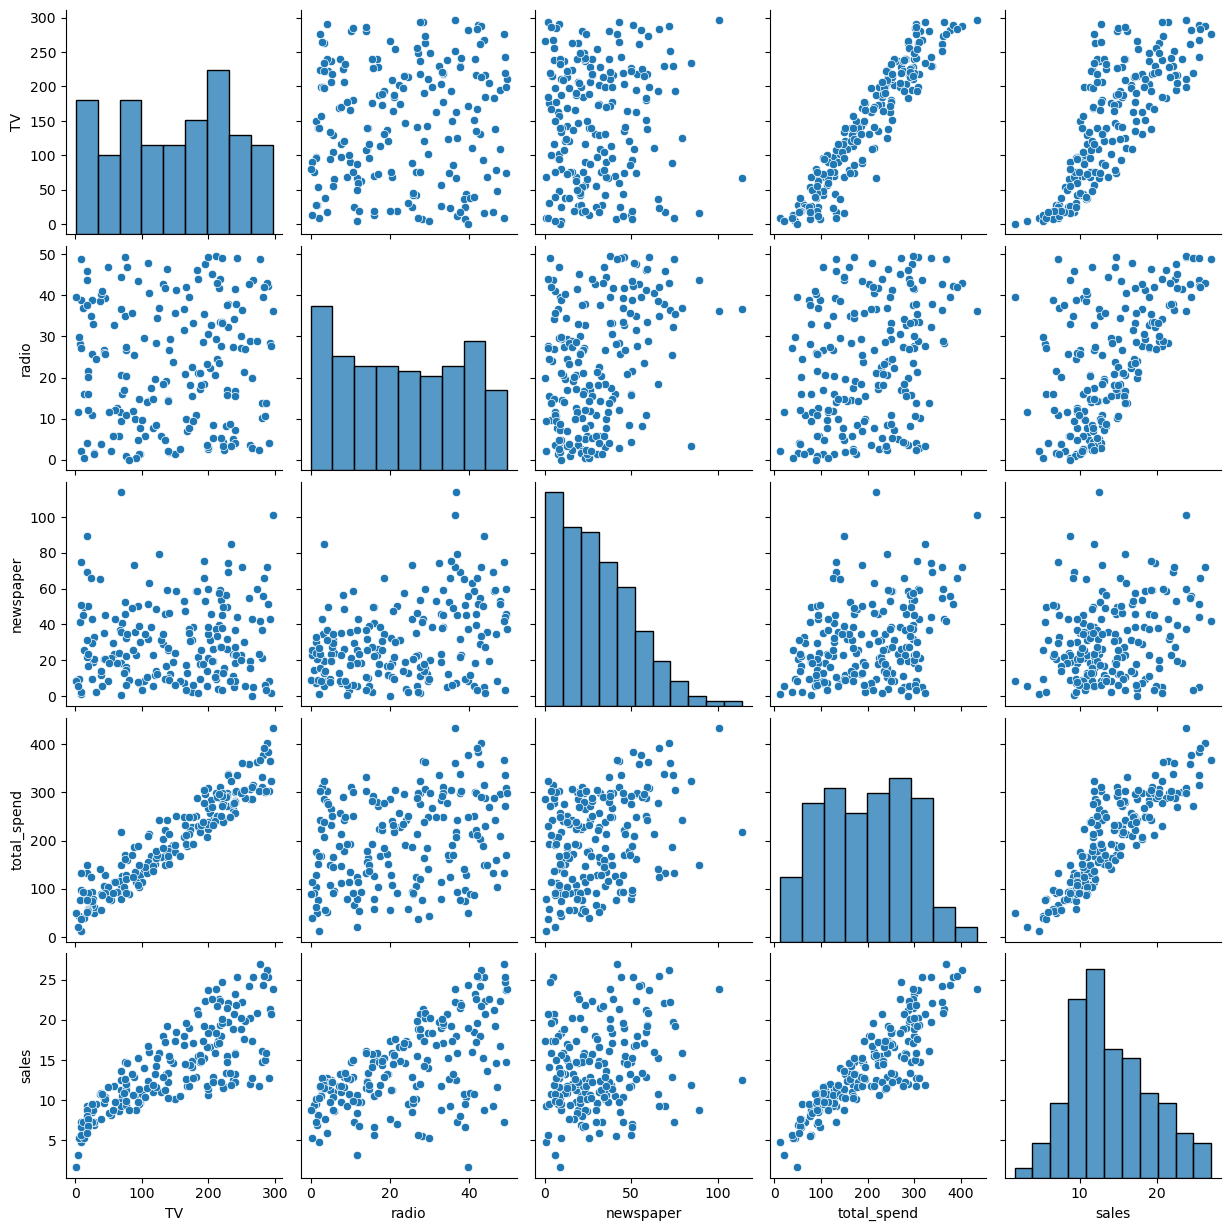

In [29]:
sns.pairplot(df)

In [ ]:
#pip install scipy

In [30]:
import scipy.stats as stats

## Which feature is more suitable for linear regression?

In [31]:
for i in df.drop(columns = "sales"):
    print(f"corr between sales and {i:<12}: {df.sales.corr(df[i])}")

corr between sales and TV          : 0.7822244248616063
corr between sales and radio       : 0.5762225745710553
corr between sales and newspaper   : 0.22829902637616534
corr between sales and total_spend : 0.8677123027017422


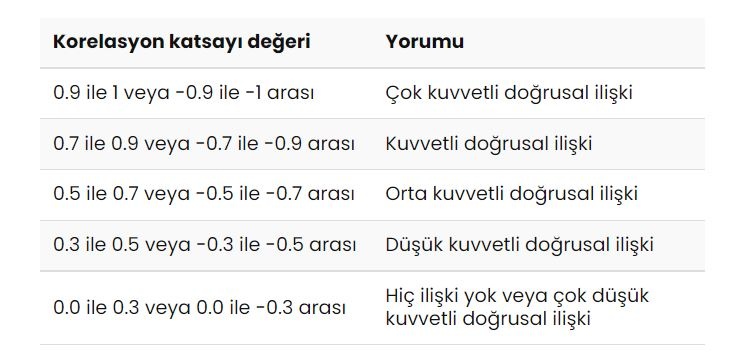

In [35]:
pip install --upgrade matplotlib

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB 640.0 kB/s eta 0:00:13
   ---------------------------------------- 0.1/8.0 MB 656.4 kB/s eta 0:00:13
    --------------------------------------- 0.2/8.0 MB 1.5 MB/s eta 0:00:06
   -- ------------------------------------- 0.4/8.0 MB 2.4 MB/s eta 0:00:04
   --- ------------------------------------ 0.7/8.0 MB 3.1 MB/s eta 0:00:03
   ---- ----------------------------------- 0.9/8.0 MB 3.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.1/8.0 MB 3.8 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.0 MB 4.4 MB/s eta 0:00:02
   --------- ------------------------------ 1.9/8.0 MB 4.6 MB/s eta 0:00:02
   ----------- ---------------------------- 2.2/8.0 MB 4.8 MB/s eta 0:00:02
   ------------ --------------------------- 2.5/8.0 MB 5.0 MB/s eta 0:00:02
   -------------- ------------------------- 2.8/8.0 MB 5.1 MB/s eta 0:00:02
   ------------

ERROR: Could not install packages due to an OSError: [WinError 5] Erişim engellendi: 'c:\\users\\ozyur\\anaconda3\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



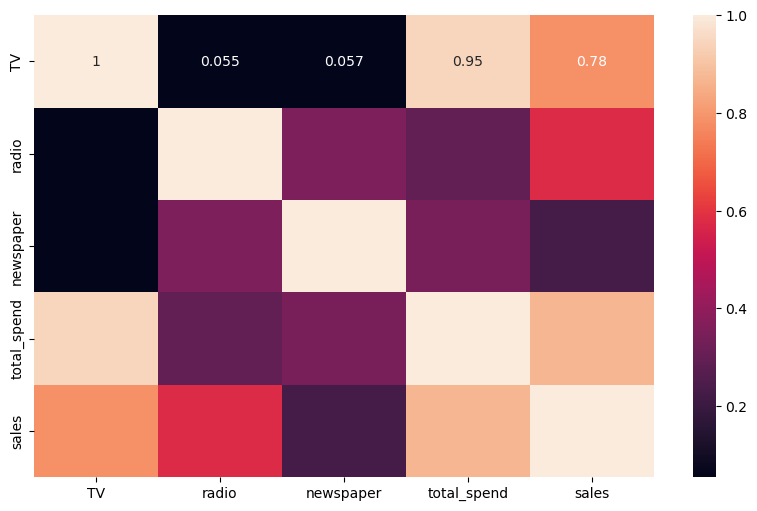

In [36]:
sns.heatmap(df.corr(), annot=True);

In [37]:
# total_spend'e göre sales yeni df belirleyelim

df=df[["total_spend","sales"]]
df.head()

#y=ax+b linear regression yapmak için bu şekilde yapıyoruz

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


<Axes: xlabel='total_spend', ylabel='sales'>

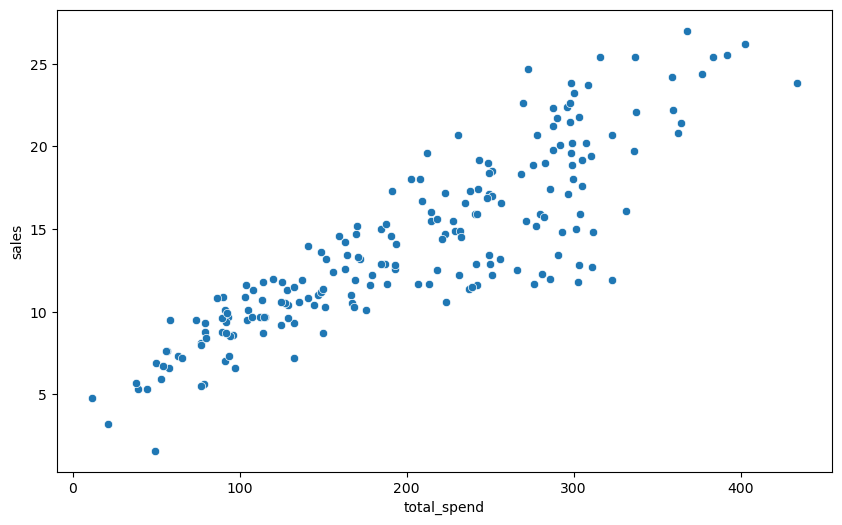

In [38]:
sns.scatterplot(x="total_spend",y="sales",data=df)

## Correlation between independent variable and dependent variable

In [41]:
corr = df.sales.corr(df.total_spend)
corr


# alternatif olarak şöyle de olabilir:

#df["total_spend"].corr(df["sales"]) 

0.8677123027017422

## Coefficant of determination (R2)

In [ ]:
# gösterilen methot sadece simple linear regression için geçerlidir.

In [42]:
R2_score = corr ** 2
R2_score

0.7529246402599598

In [ ]:
# elimizdeki datalar ile satış rakamlarını %75 açıklayabiliriz.

# Linear Regression

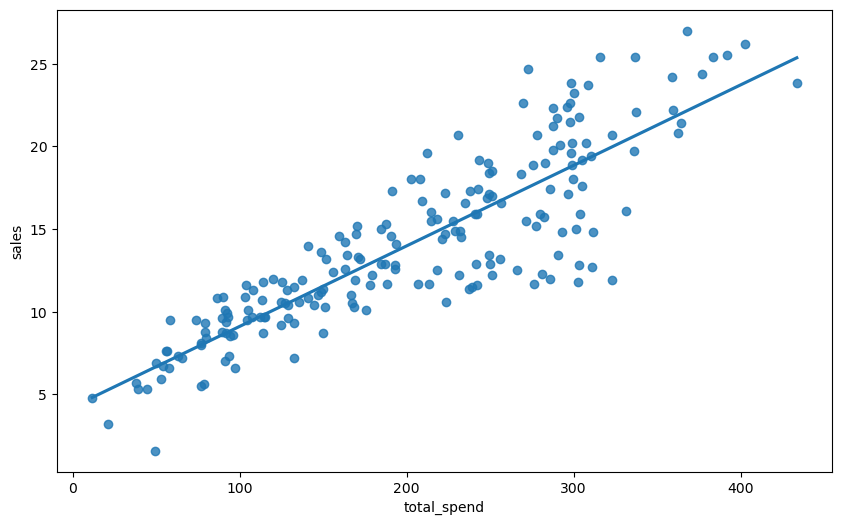

In [43]:
# Least square Error LSE ile Line of Best fit seçimi
sns.regplot(x = "total_spend", y ="sales", data=df, ci=None);

#ci: confidence internal (istenirse belli bir güven aralığı verilebilir %95 olabilir.)

# Spliting the dataset into X (independent variables) and y (dependent variables)